# Задание 6
- Шеверев Сергей Вячеславович
- 22М-05ММ
- Вариант 3:
     1) Построим корреляционную матрицу по метрическим показателям и найдем наиболее значимую корреляцию. Для этого случая построим двумерную диаграмму. Применим модель множественной регрессии для зависимой прееменной **индекс МТ детский** и зависимыми переменными:
         - возраст
         - рост
         - вес 
         - имт
         - диастолический размер левого желудочка
         - фракция выброса.
         
        Определим значимость прогноза  и наиболее значимые переменные.
  
     2) Факторный анализ: проинтерпритируем главные компоненты, определим вклад первых двух в общую дисперсию и построим двумерную диаграмму первых двух факторов
     3) Дискриминантный анализ: выясним возможности классификации детей с разными формами ожирения.

In [109]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats


In [110]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Считаем датасет:

In [111]:
df = pd.read_csv('dataX.csv')

Посмотрим на датасет:

In [112]:
df.head()

,Unnamed: 0,Sex,Age,Половое.развитие..0...допубертатное..1..отставание..2...норма..3...опережение,liv,eye,sss,kidneys,OL,рост.см.,вес.кг.,ИМТ,Z.Score_Height.ageWHO,LZ_KDR,FV_Tejh
0,1,1,13.5863,NaN,0,0,0,0,2,177.0,87.6,27.9613,2.20,NaN,NaN
1,2,1,12.0630,NaN,0,0,0,0,3,155.5,69.1,28.5770,0.85,NaN,NaN
2,3,2,10.3890,NaN,0,0,0,0,1,144.5,43.2,20.6894,0.53,NaN,NaN
3,4,1,10.8301,0.0,1,1,1,0,4,156.0,79.0,32.4622,2.08,50.0,64.0
4,5,1,12.1370,NaN,0,1,0,0,2,170.0,73.1,25.2941,2.82,46.0,66.0


Очень подозрительно выглядят следующие признаки:
- *Половое.развитие..0...допубертатное..1..отставание..2...норма..3...опережение*
- *LZ_KDR*
- *FV_Tejh*

Очень много пропущенных значений:

In [113]:
df[['Половое.развитие..0...допубертатное..1..отставание..2...норма..3...опережение', 'LZ_KDR', 'FV_Tejh' ]].isnull().sum()

Половое.развитие..0...допубертатное..1..отставание..2...норма..3...опережение    156
LZ_KDR                                                                           122
FV_Tejh                                                                          123
dtype: int64

In [114]:
len(df)

253

### Корреляционная матрица:

Посмтроим корреляционную матрицу по метрическим показателям: 
- Age
- рост.см.
- вес.кг.
- ИМТ
- Z.Score_Height.ageWHO
- LZ_KDR
- FV_Tejh

Воспользуемся библиотечной функцией ```corr```


In [115]:
metric_keys = ['Age', 'рост.см.', 'вес.кг.', 'ИМТ', 'Z.Score_Height.ageWHO', 'LZ_KDR', 'FV_Tejh']
correlations_matrix = df[metric_keys].corr()
correlations_matrix

,Age,рост.см.,вес.кг.,ИМТ,Z.Score_Height.ageWHO,LZ_KDR,FV_Tejh
Age,1.000000,0.789528,0.595024,0.245941,-0.225813,0.365573,-0.000410
рост.см.,0.789528,1.000000,0.700450,0.228837,0.355684,0.530800,0.017995
вес.кг.,0.595024,0.700450,1.000000,0.845523,0.190932,0.596030,0.104919
ИМТ,0.245941,0.228837,0.845523,1.000000,-0.009149,0.406308,0.116415
Z.Score_Height.ageWHO,-0.225813,0.355684,0.190932,-0.009149,1.000000,0.220983,0.002299
LZ_KDR,0.365573,0.530800,0.596030,0.406308,0.220983,1.000000,0.097197
FV_Tejh,-0.000410,0.017995,0.104919,0.116415,0.002299,0.097197,1.000000


Найдем наиболее значимую корреляцию:

In [116]:
import itertools


max_a = correlations_matrix.keys()[0]
max_b = correlations_matrix.keys()[1]
max_value = correlations_matrix[max_a][max_b]
for a, b in itertools.combinations(metric_keys, 2):
    if np.fabs(correlations_matrix[a][b]) > np.fabs(max_value):
        max_a, max_b, max_value = a, b, correlations_matrix[a][b]

print(max_a, max_b, max_value)

вес.кг. ИМТ 0.8455227633826613


Действительно, корреляция признаков `вес.кг.` и `ИМТ` наиболее значимая: ~$0.85$

### Диаграмма:

Для данной пары метрических переменных построим двумерную диаграмму: 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


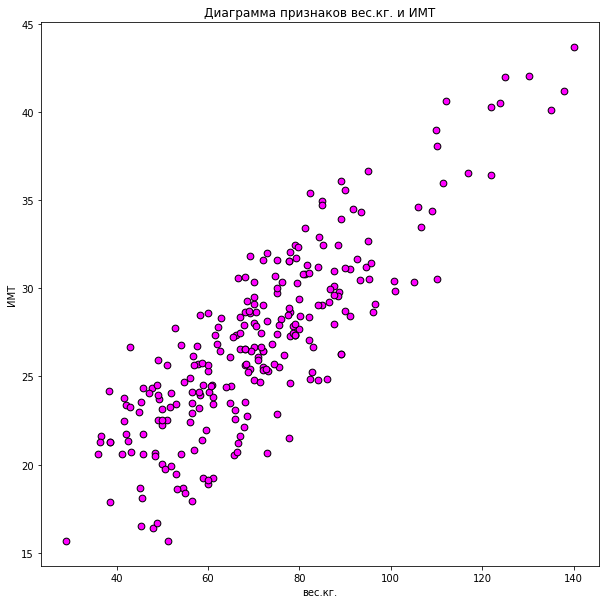

In [117]:
plt.figure().set_size_inches(10, 10)
plt.title(f'Диаграмма признаков {max_a} и {max_b}')
plt.scatter(df[max_a], df[max_b], s=45, c=(1, 0, 1, 1.0), edgecolors=(0, 0, 0, 1.0))
plt.xlabel(max_a)
plt.ylabel(max_b)
plt.show()

Между переменными прослеживается четкая зависимость, предположительно линейная.

### Применим модель множественной регрессии:

Воспользуемся моделю регрессии из библиотеки $\texttt{sklearn}$

Однако, данные содержат пропущенные значения, поэтому необходимо как-то их обработать. Для этого воспользуемся ``sklearn.impute.SimpleImputer``

In [118]:
from sklearn import linear_model 
from sklearn.impute import SimpleImputer
target = 'Z.Score_Height.ageWHO'
if target in  metric_keys:
    metric_keys.remove(target)

X = df[metric_keys]
y  = df[target]

X = SimpleImputer(missing_values=np.nan, strategy = 'mean').fit_transform(X, y)
model  = linear_model.LinearRegression().fit(X, y)
coefs = model.coef_

Посмотрим на значимость прогноза:

In [119]:
model.score(X, y)

0.8083265291551404

Регрессионная модель способна объяснить $80$% дисперсии целевой зависимой пременной

Посмотрим на наиболее значимые переменные:

In [120]:
#sorted(zip(metric_keys, model.coef_),  key = lambda x: np.abs(x[1]), reverse=True)
pd.DataFrame(data=sorted(zip(metric_keys, model.coef_),  key = lambda x: np.abs(x[1]), reverse=True))

,0,1
0,Age,-0.596275
1,рост.см.,0.114827
2,FV_Tejh,-0.004716
3,LZ_KDR,0.004228
4,ИМТ,-0.001289
5,вес.кг.,0.000108


Двумя наиболее значимымы пременными являются возраст и рост


### Факторный анализ

Выполним факторный анализ с использованием библиотеки ``statmodels``

Нам интересны первые две компоненты, соответственно параметр `n_factor` класса `Factor` положим равным двум

In [121]:
from statsmodels.multivariate.factor import Factor
X = df.drop('Z.Score_Height.ageWHO', axis=1)
fa = Factor(X, n_factor=2, method='pa')#pa == метод главных компонент
res = fa.fit()

Посмотрим на матрицу факторных нагрузок:

In [122]:
res.get_loadings_frame(threshold=0.3)

,factor 0,factor 1
вес.кг.,0.976894,0.141996
ИМТ,0.886677,-0.301085
OL,0.758271,-0.641419
LZ_KDR,0.648790,0.307115
liv,0.404203,-0.274578
sss,0.331890,0.043236
Sex,-0.257472,-0.102389
kidneys,0.081396,0.076505
рост.см.,0.454342,0.825733
Age,0.286716,0.786222


Можно увидеть, что переменные имеют "значимые" (thresold > 0.3) факторные нагрузки только с одним из двух факторов. Фактор `factor 0` имеет сильную отрицательную корреляцию с переменными веса, ИМТ и ожирением, а фактор `factor 1` - с перменными роста, возраста и полового развития.

Проинтерпритируем факторы: 
- **factor 0** может выступать в роли фактора, описывающего некторые параметры, связанные с лишним весом
- **factor 1** выступает в роли фактора, описывающего некоторые возрастные параметры

Посмотрим на вклад факторов в дисперсию:

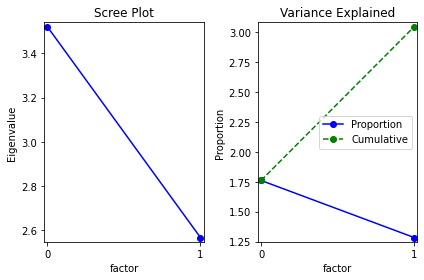

In [123]:
res.plot_scree(2)
plt.show()

Видим, что `factor_0` имеет значительно больший вклад в дисперсию

### Построим двумерную диаграмму:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


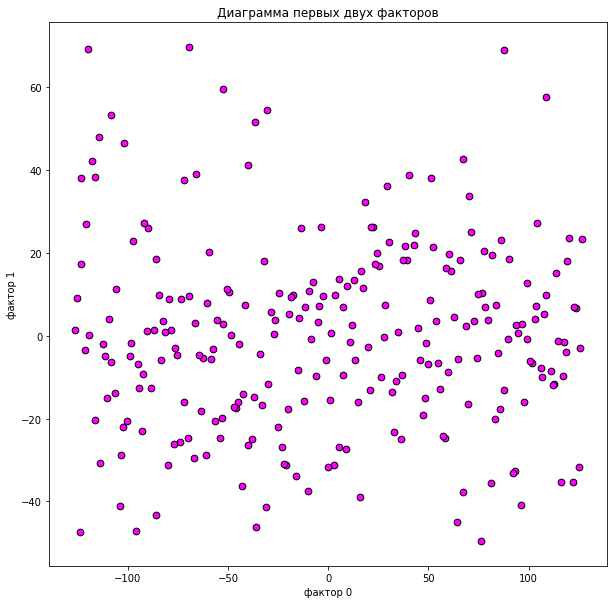

In [124]:
from sklearn.decomposition import FactorAnalysis, PCA
X = SimpleImputer(missing_values=np.nan, strategy = 'mean').fit_transform(X)
#fa = FactorAnalysis(n_components=2)
#fa.fit(X)
pca = PCA(n_components=2)
pca.fit(X)
#factors = fa.transform(X)
factors = pca.transform(X)

plt.figure().set_size_inches(10, 10)
plt.title('Диаграмма первых двух факторов')
plt.scatter(factors[:, 0], factors[:, 1], s=45, c=(1, 0, 1, 1.0), edgecolors=(0, 0, 0, 1.0))
plt.xlabel('фактор 0')
plt.ylabel('фактор 1')
plt.show()

In [125]:
pca.explained_variance_ratio_

array([0.89506077, 0.0872209 ])

## Дискриминантный анализ:

Выясним возможности по классификации детей с разными формами ожирения: -1, 0, 1, 2, 3, 4, 5

In [126]:
from sklearn. discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import  confusion_matrix
target = 'OL'
variables = list(df.keys())
variables.remove('Unnamed: 0')
variables.remove(target)
X = SimpleImputer(missing_values=np.nan, strategy = 'mean').fit_transform(df[variables])
y = df[target]
model = LinearDiscriminantAnalysis().fit(X, y)


Посмотрим на точность классификации:

In [127]:
model.score(X, y)

0.8972332015810277

Довольно высокий показатель точности: почти 90% верно классифицированных объектов

Посмотрим на матрицу качества классификации:

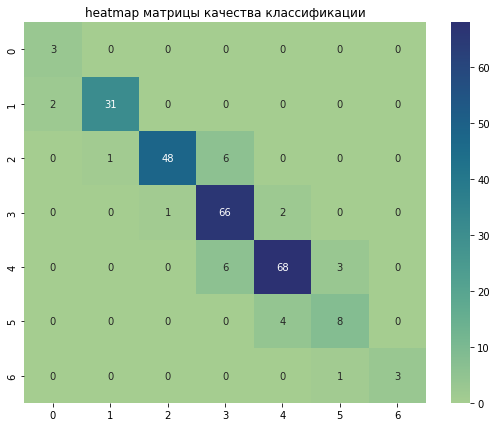

In [128]:
import seaborn
plt.figure().set_size_inches(9, 7)
plt.title('heatmap матрицы качества классификации')
seaborn.heatmap(confusion_matrix(y, model.predict(X)), annot=True, cmap="crest")
plt.show()

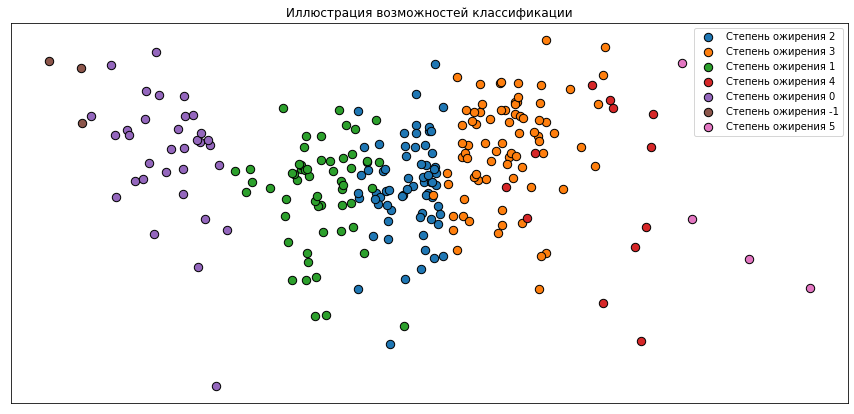

In [129]:
plot_data = model.transform(X)
plt.figure().set_size_inches(15, 7)
plt.title('Иллюстрация возможностей классификации')
for  i in y.unique():
    plt.scatter (plot_data[y == i, 0], plot_data[y == i, 1], label=f"Степень ожирения {i}", s=70, edgecolors=(0, 0, 0, 1.0))
plt.legend(loc='best', shadow= False , scatterpoints=1)
plt.xticks([])
plt.yticks([])
plt.show()

На диаграмме видно, что классы объектов с разной степенью ожирения (`OL`) практиески не "накладываются" друг на друга 